In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import joblib
from sklearn.model_selection import learning_curve
from niapy.problems import Problem
from niapy.task import Task
from niapy.algorithms.basic import ParticleSwarmOptimization

In [3]:
path =  'C://python//train//'
fallPath = path + 'fall_csv_test//'
normalPath = path + 'normal_csv_test//'

In [4]:
label = []
restFallFrame = 10

In [5]:
for file in os.listdir(fallPath):
    df = pd.read_csv(fallPath + file)
    print(df.shape)

(112, 81)
(95, 81)
(130, 81)
(109, 81)
(63, 81)
(61, 81)
(49, 81)
(55, 81)
(88, 81)
(43, 81)
(49, 81)
(108, 81)
(110, 81)
(46, 81)
(52, 81)
(53, 81)
(40, 81)
(51, 81)
(46, 81)
(73, 81)
(56, 81)
(83, 81)
(194, 81)
(50, 81)
(87, 81)
(137, 81)
(100, 81)
(155, 81)
(88, 81)
(176, 81)


In [6]:
for file in os.listdir(normalPath):
    df = pd.read_csv(normalPath + file)
    print(df.shape)

(125, 81)
(191, 81)
(208, 81)
(173, 81)
(129, 81)
(137, 81)
(197, 81)
(95, 81)
(128, 81)
(168, 81)
(82, 81)
(132, 81)
(185, 81)
(128, 81)
(94, 81)
(79, 81)
(70, 81)
(110, 81)
(95, 81)
(100, 81)
(83, 81)
(125, 81)
(163, 81)
(186, 81)
(241, 81)
(199, 81)
(173, 81)
(166, 81)
(254, 81)
(249, 81)
(306, 81)
(172, 81)
(179, 81)
(147, 81)
(199, 81)
(175, 81)
(198, 81)
(170, 81)
(147, 81)
(136, 81)


In [7]:
for file in os.listdir(fallPath):
    df = pd.read_csv(fallPath + file)
    for i in range(len(df)):
        if i >= restFallFrame:
            label.append(1)
        else:
            label.append(-1)

In [8]:
for file in os.listdir(normalPath):
    df = pd.read_csv(normalPath+file)
    for i in range(len(df)):
        label.append(-1)

In [9]:
label, len(label)

([-1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,


In [10]:
label.count(1), label.count(-1)

(2259, 6594)

In [11]:
rawFallData = pd.concat([pd.read_csv(fallPath + file) for file in os.listdir(fallPath)])
rawNormalData = pd.concat([pd.read_csv(normalPath + file) for file in os.listdir(normalPath)]) 

In [12]:
rawFallData

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0.651598,0.257889,-0.285666,0.656591,0.247985,-0.273531,0.659789,0.247940,-0.273592,0.662458,...,-0.012544,0.638693,0.471851,0.012599,0.691402,0.572148,0.000495,0.638061,0.574266,0.055360
1,0.650076,0.257751,-0.267128,0.654723,0.247624,-0.256212,0.657806,0.247425,-0.256283,0.660694,...,-0.014143,0.638666,0.466635,0.014177,0.691514,0.571998,-0.067445,0.638069,0.571752,-0.007915
2,0.647735,0.257586,-0.271086,0.652302,0.247364,-0.260581,0.655417,0.247081,-0.260647,0.658501,...,-0.014073,0.638348,0.463792,0.014087,0.691518,0.570543,-0.048314,0.638528,0.570099,-0.005033
3,0.646487,0.257300,-0.271709,0.651111,0.247117,-0.261637,0.654264,0.246790,-0.261702,0.657422,...,-0.015806,0.638307,0.463039,0.015789,0.690532,0.569358,-0.061457,0.639063,0.568123,0.015126
4,0.643686,0.257314,-0.258833,0.648271,0.247072,-0.250596,0.651686,0.246650,-0.250662,0.655047,...,-0.015661,0.637129,0.462352,0.015644,0.688489,0.568880,-0.063215,0.639061,0.566538,0.000771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0.160799,0.963536,-0.464292,0.141949,0.984514,-0.459444,0.138463,0.983681,-0.459612,0.135655,...,0.097966,0.494368,0.930131,-0.097826,0.383680,0.765775,0.361050,0.398315,0.737388,0.063729
172,0.152787,0.970812,-0.363840,0.140875,0.992987,-0.369465,0.137268,0.994688,-0.369625,0.134554,...,0.093871,0.490704,0.929690,-0.093735,0.393003,0.803129,0.409193,0.408441,0.733361,0.140384
173,0.156595,0.986550,-0.394220,0.145853,1.005527,-0.413725,0.143367,1.008559,-0.413865,0.141309,...,0.067935,0.480640,0.930157,-0.067865,0.421744,0.829051,0.443557,0.431663,0.783168,0.261280
174,0.509581,0.816944,0.195854,0.518014,0.817572,0.195569,0.519276,0.819804,0.195499,0.520471,...,-0.034004,0.375111,0.913560,0.033621,0.290092,0.891248,-0.023269,0.273580,0.911615,0.050632


In [13]:
rawNormalData

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0.686161,0.302170,-0.303616,0.690625,0.293724,-0.294094,0.693496,0.293666,-0.294150,0.696470,...,-0.028432,0.674161,0.496215,0.028486,0.713164,0.602149,-0.063613,0.684355,0.598927,0.037716
1,0.684368,0.302311,-0.366379,0.688871,0.293740,-0.353751,0.691800,0.293676,-0.353779,0.694756,...,-0.015522,0.673684,0.495198,0.015555,0.709554,0.596432,-0.061623,0.683163,0.598763,-0.028504
2,0.684070,0.302624,-0.367500,0.688548,0.293905,-0.355287,0.691555,0.293879,-0.355315,0.694513,...,-0.012509,0.672282,0.494272,0.012536,0.705786,0.594104,-0.057184,0.681038,0.597903,-0.033443
3,0.683571,0.302659,-0.344052,0.688139,0.293979,-0.333747,0.691201,0.294003,-0.333794,0.694130,...,-0.013894,0.669266,0.494300,0.013928,0.702623,0.593927,-0.051594,0.677677,0.596964,-0.016476
4,0.681350,0.302996,-0.338390,0.686035,0.294208,-0.327354,0.689066,0.294210,-0.327389,0.692042,...,-0.012743,0.667627,0.494316,0.012759,0.702083,0.594267,-0.048915,0.676358,0.598188,-0.017027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.797275,0.413273,-0.089693,0.804522,0.394290,-0.109114,0.807743,0.393152,-0.109159,0.811475,...,-0.100953,0.881595,0.714305,0.100853,0.749545,0.658479,-0.161680,0.738101,0.659262,0.120732
132,0.804761,0.407230,-0.095279,0.811716,0.388854,-0.114854,0.814683,0.387803,-0.114903,0.818115,...,-0.105896,0.884629,0.713104,0.105867,0.753012,0.658779,-0.163984,0.738938,0.656909,0.122016
133,0.808491,0.405097,-0.105900,0.816377,0.386900,-0.126842,0.819481,0.385890,-0.126854,0.823148,...,-0.106798,0.883423,0.709148,0.106767,0.756935,0.659250,-0.189447,0.741309,0.656141,0.093265
134,0.811653,0.400180,-0.121870,0.820245,0.382697,-0.143654,0.823158,0.381898,-0.143660,0.826365,...,-0.107070,0.883095,0.704104,0.107058,0.756915,0.659654,-0.185825,0.742222,0.655858,0.093299


In [14]:
data = np.concatenate((rawFallData, rawNormalData), axis=0)
datapd = pd.concat((rawFallData, rawNormalData), axis=0)

In [15]:
label = np.array(label)

In [16]:
data

array([[ 0.65159833,  0.25788909, -0.28566572, ...,  0.63806057,
         0.5742656 ,  0.05536003],
       [ 0.65007609,  0.25775057, -0.26712832, ...,  0.6380688 ,
         0.57175159, -0.00791477],
       [ 0.64773494,  0.25758556, -0.27108636, ...,  0.63852823,
         0.57009941, -0.00503285],
       ...,
       [ 0.80849087,  0.40509698, -0.10590033, ...,  0.74130946,
         0.6561411 ,  0.09326512],
       [ 0.81165284,  0.40018022, -0.12186953, ...,  0.74222243,
         0.6558581 ,  0.09329873],
       [ 0.81400508,  0.39316183, -0.12038217, ...,  0.74190593,
         0.65652698,  0.10071959]])

In [17]:
indices = np.arange(label.shape[0])

In [18]:
np.random.shuffle(indices)

In [19]:
data, label = data[indices], label[indices]

In [20]:
class SVMFeatureSelection(Problem):
    def __init__(self, X_train, y_train, alpha=0.99):
        super().__init__(dimension=X_train.shape[1], lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train
        self.alpha = alpha

    def _evaluate(self, x):
        selected = x > 0.5
        num_selected = selected.sum()
        if num_selected == 0:
            return 1.0
        accuracy = cross_val_score(SVC(), self.X_train[:, selected], self.y_train, cv=2, n_jobs=-1).mean()
        score = 1 - accuracy
        num_features = self.X_train.shape[1]
        return self.alpha * score + (1 - self.alpha) * (num_selected / num_features)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=0, shuffle=True)

In [22]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= .25, shuffle=True)

In [23]:
problem = SVMFeatureSelection(x_train, y_train)
task = Task(problem, max_iters=50)
algorithm = ParticleSwarmOptimization(population_size=40, group_size=20)
best_features, best_fitness = algorithm.run(task)

In [43]:
selected_features = best_features >= 0.5

In [48]:
selected_features

array([ True,  True, False, False, False, False,  True, False,  True,
        True,  True, False, False,  True, False, False,  True, False,
        True, False, False,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False,  True,  True, False,
        True,  True,  True,  True, False, False,  True,  True, False,
        True, False,  True,  True, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True, False,  True, False,  True])

In [49]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(x_train[:,selected_features], y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.882 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.869 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.884 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.873 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.879 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.810 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.813 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.810 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.805 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.797 total time=   0.2s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.888 total time=   0.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=3)

In [50]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [51]:
grid_pred = grid.predict(x_test[:,selected_features])
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

          -1       0.96      0.98      0.97      1310
           1       0.95      0.88      0.91       461

    accuracy                           0.96      1771
   macro avg       0.95      0.93      0.94      1771
weighted avg       0.96      0.96      0.96      1771



In [52]:
model = SVC(kernel='rbf', C=10, gamma=1)
model.fit(x_train[:,selected_features], y_train)

SVC(C=10, gamma=1)

In [53]:
scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro']

In [54]:
for score in scoring:
    scores = cross_val_score(model, x_val[:,selected_features], y_val, cv=10, scoring=score)
    print(score, scores.mean())

accuracy 0.9197962292896591
precision_macro 0.9173849776460085
recall_macro 0.8704884641301833
f1_macro 0.8887607974633953


In [55]:
y_pred = model.predict(x_test[:,selected_features])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.96      0.98      0.97      1310
           1       0.95      0.88      0.91       461

    accuracy                           0.96      1771
   macro avg       0.95      0.93      0.94      1771
weighted avg       0.96      0.96      0.96      1771



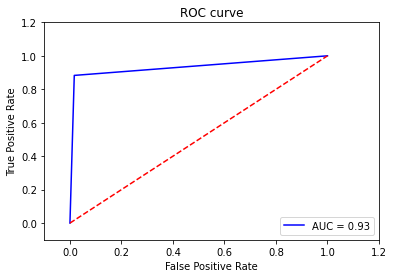

In [56]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('ROC curve')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [57]:
cm = confusion_matrix(y_test, y_pred)

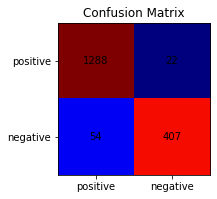

In [58]:
norm_conf = []
for i in cm:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = cm.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

In [66]:
joblib.dump(model, path + 'model//model_test.sav')

['C://python//train//model//model_test.sav']

In [59]:
train_sizes, train_scores, valid_scores = learning_curve(model, data[:,selected_features], label, train_sizes=[6,50,100,200,400,500,1000,1300,1800,2000,2500,3000,3500,4000,5000,6000,6500,7000,7300,7800], cv=10, scoring='accuracy', n_jobs=-1)

In [60]:
train_scores = np.nan_to_num(train_scores)
valid_scores = np.nan_to_num(valid_scores)

In [61]:
train_mean = np.mean(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)

In [62]:
train_mean

array([1.        , 0.962     , 0.963     , 0.927     , 0.9505    ,
       0.9462    , 0.9443    , 0.94623077, 0.95033333, 0.9503    ,
       0.95316   , 0.9514    , 0.95202857, 0.953475  , 0.95368   ,
       0.95638333, 0.95775385, 0.95802857, 0.95906849, 0.96019231])

In [63]:
valid_mean

array([0.7795081 , 0.80978256, 0.8426532 , 0.86094834, 0.88726824,
       0.90127482, 0.91878282, 0.92217176, 0.9322252 , 0.93199946,
       0.93809988, 0.93967989, 0.94182627, 0.94419928, 0.94668325,
       0.95142735, 0.95300914, 0.95346125, 0.95459068, 0.95651095])

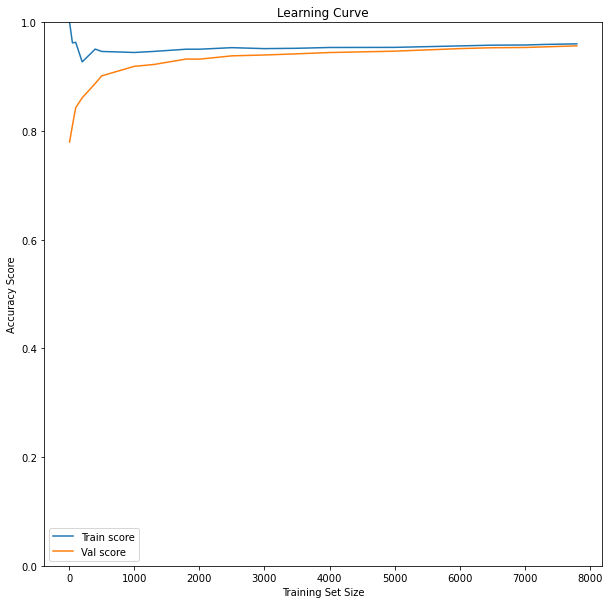

In [64]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, label="Train score")
plt.plot(train_sizes, valid_mean, label="Val score")
plt.ylim(0,1)
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")

In [68]:
selected_features.tofile(path + 'model//selected_features.txt', sep='\t', format='%d')

In [82]:
selFea = pd.read_csv(path + 'model//selected_features.txt', sep='\t', header=None).to_numpy().astype(bool).flatten()

In [83]:
selFea

array([ True,  True, False, False, False, False,  True, False,  True,
        True,  True, False, False,  True, False, False,  True, False,
        True, False, False,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False,  True,  True, False,
        True,  True,  True,  True, False, False,  True,  True, False,
        True, False,  True,  True, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True, False,  True, False,  True])

In [84]:
lst = [0.5068968534469604, 0.15018409490585327, -0.21686705946922302, 0.5122820138931274, 0.13569137454032898, -0.20200666785240173, 0.5154919028282166, 0.13572028279304504, -0.20205430686473846, 0.5177676677703857, 0.13598033785820007, -0.20206455886363983, 0.5019574165344238, 0.1367654800415039, -0.20230896770954132, 0.49857836961746216, 0.13750287890434265, -0.20232148468494415, 0.4951932430267334, 0.13821342587471008, -0.2023628205060959, 0.5233705639839172, 0.14359110593795776, -0.10967768728733063, 0.4924873411655426, 0.14578214287757874, -0.11209453642368317, 0.5138666033744812, 0.16635558009147644, -0.18200166523456573, 0.5003940463066101, 0.16664999723434448, -0.18269234895706177, 0.5505983829498291, 0.2434782087802887, -0.05229399353265762, 0.46922725439071655, 0.24694609642028809, -0.05176364257931709, 0.5591613054275513, 0.3530915379524231, -0.033014994114637375, 0.4576631188392639, 0.3609820604324341, -0.027024248614907265, 0.5553296208381653, 0.44844910502433777, -0.14289365708827972, 0.4631655812263489, 0.45157572627067566, -0.11593198776245117, 0.555432140827179, 0.4853772521018982, -0.1765054613351822, 0.4615914225578308, 0.4870178699493408, -0.14355240762233734, 0.5495172142982483, 0.48264646530151367, -0.20085708796977997, 0.4678950905799866, 0.48241040110588074, -0.17132626473903656, 0.5475319623947144, 0.4733392000198364, -0.1546136438846588, 0.4703773856163025, 0.47156426310539246, -0.1280270516872406, 0.5321699976921082, 0.4570658504962921, 0.0005566587788052857, 0.48577386140823364, 0.45729097723960876, -0.000570975651498884, 0.5330971479415894, 0.6276837587356567, -0.018035586923360825, 0.48783963918685913, 0.6242152452468872, -0.010138826444745064]


In [94]:
lst[selFea]

TypeError: only integer scalar arrays can be converted to a scalar index

In [92]:
len(newlst)

34